In [1]:
# Imports
%config InlineBackend.figure_format = 'retina'
%pylab inline
import sys
sys.path.append('../../src/')
from helpers import *
from plothelpers import *
from BayesianNamingGame import *
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec as SubGridSpec

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Run experiments
K = 16
setup = dict(
    T = 10000, num_datapoints = 100, 
    K = K, N = 15, b = 1,
    alpha = 1.1*K*get_pis(K)['peak'],
    chain=True, record=False, record_utterances=True)

results = {}
for gamma in [1, 10, 100, 'inf']:
    for eta in [1, 'inf']:
        for zeta in [1, 'inf']:
            setup['gamma'] = gamma
            setup['eta'] = eta
            setup['zeta'] = zeta
            results[(gamma, eta, zeta)] = BNG_simulation(**setup)

In [4]:
def show_res(res, setup):
    K = setup['K']
    xs = arange(K)

    # Psi
    utterances = res['utterances'].todense()
    words = utterances.argmax(axis=1)
    psi, _ = np.histogram(words, bins=K, range=(0, K))
    psi = psi/psi.sum()
    pyplot.bar(xs, psi, color=get_color('orange'))
    
    # Expected languages
    vs = res['counts'] + setup['alpha']
    ps = vs / vs.sum(axis=1)[:, np.newaxis]
    plot(xs, ps.mean(axis=0), 'ko-', ms=2, lw=.8)
    plot(xs, ps.T, 'k', lw=.2, alpha=.5)
    
# figure(figsize=cm2inch)
# show_res(results[('inf',1,1)], setup)

/Users/Bas/anaconda/envs/thesis2/lib/python3.6/site-packages/matplotlib/mathtext.py:851: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


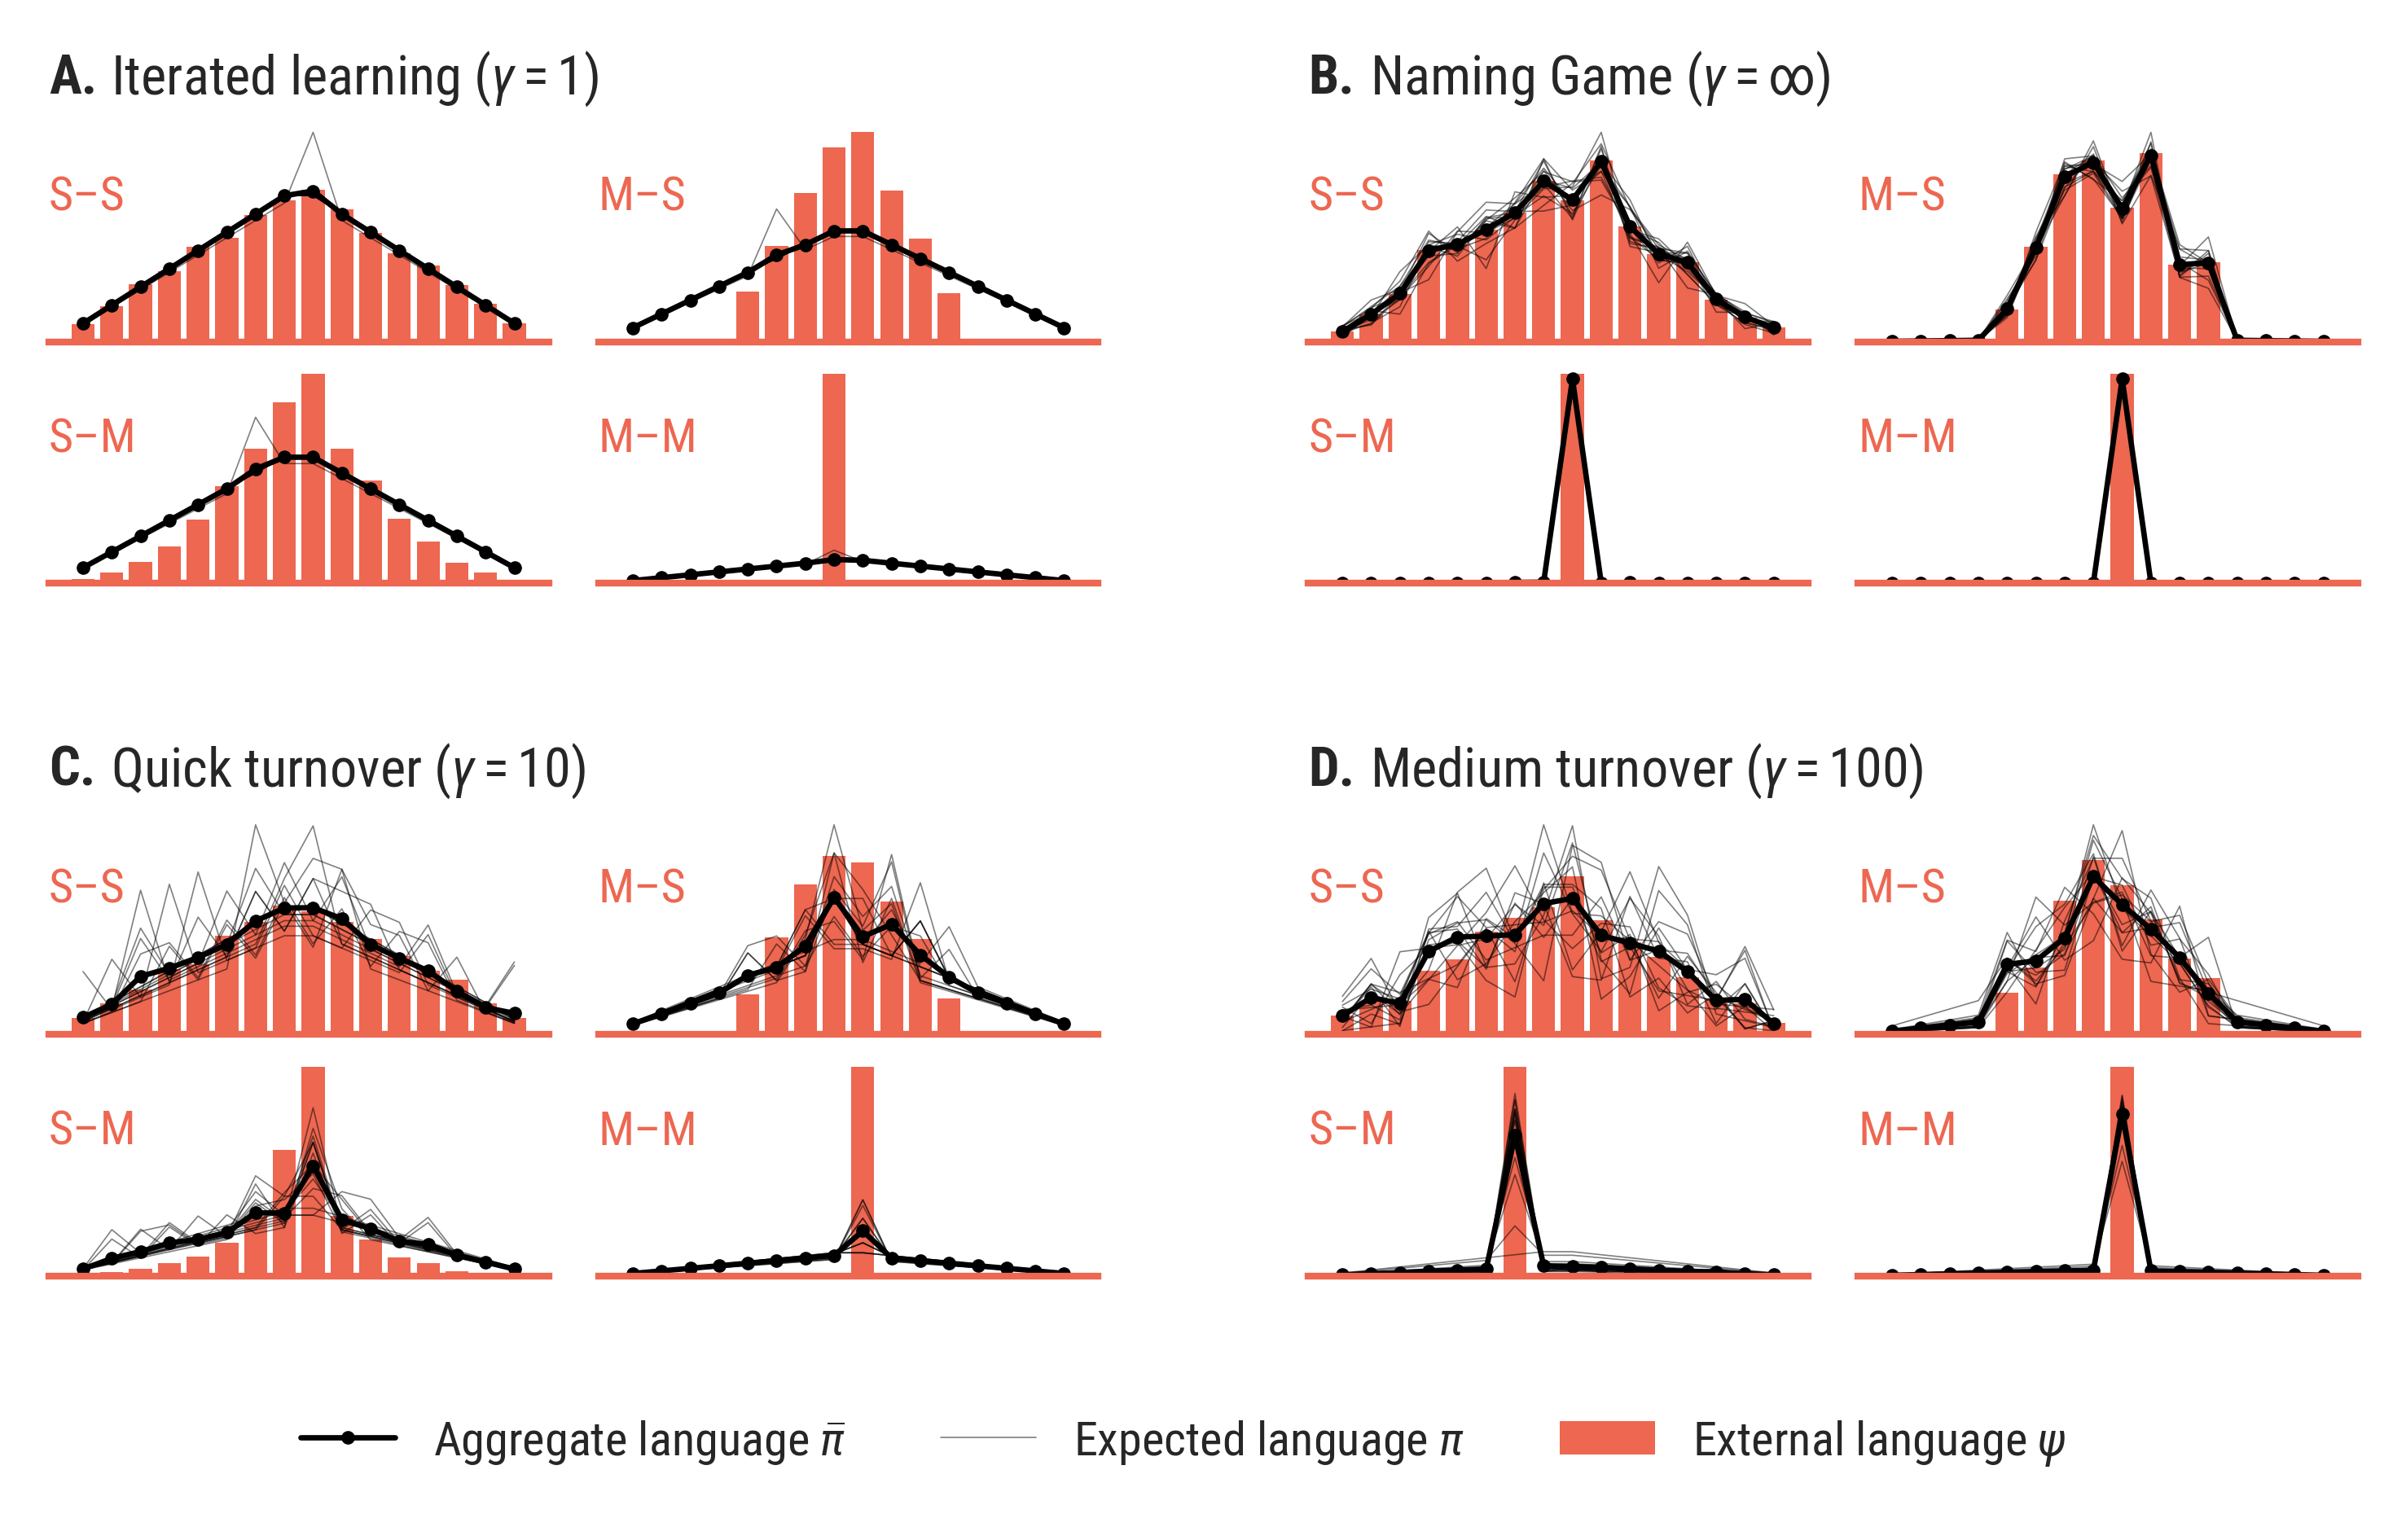

In [7]:
# Plot
figure(figsize=cm2inch(12,6))
outer = GridSpec(2,2, hspace=.5, wspace=.2)
inners = [SubGridSpec(2, 2, subplot_spec=outer[0,0]),
          SubGridSpec(2, 2, subplot_spec=outer[0,1]),
          SubGridSpec(2, 2, subplot_spec=outer[1,0]),
          SubGridSpec(2, 2, subplot_spec=outer[1,1])]

for i, gamma in enumerate([1, 'inf', 10, 100]):
    G = inners[i]
    for k, zeta in enumerate([1, 'inf']):
        for j, eta in enumerate([1, 'inf']):
            subplot(G[k, j])
            setup['gamma'], setup['eta'], setup['zeta'] = gamma, eta, zeta
            show_res(results[gamma,eta,zeta], setup)
            
            yticks([])
            xticks([])
            lstrat = 'S' if eta == 1 else 'M'
            pstrat = 'S' if zeta == 1 else 'M'
            gca().text(0, .6, f'{lstrat}–{pstrat}', 
                       color=get_color('orange'),
                       fontsize=7, transform = gca().transAxes)
#             gca().spines['bottom'].set_color(get_color('blue'))

# Titles
if True:
    ax1 = subplot(inners[0][0,0])
    title('Iterated learning ($\gamma=1$)')

    ax2 = subplot(inners[1][0,0])
    title('Naming Game ($\gamma=\infty$)')

    ax3 = subplot(inners[2][0,0])
    title('Quick turnover ($\gamma=10$)')

    ax4 = subplot(inners[3][0,0])
    title('Medium turnover ($\gamma=100$)')

# Legend
ax= subplot(inners[3][1,0])
pyplot.bar([0], [0], color=get_color('orange'), label=r'External language $\psi$')
plot([0], [0], 'ko-', ms=2, lw=.8, label=r'Aggregate language $\bar{\pi}$')
plot([0], [0], 'k', lw=.2, alpha=.5, label=r'Expected language $\pi$')
legend(bbox_to_anchor=(-.25,-1), ncol=3, loc='lower center')

restyle_title(ax1, ax2, ax3, ax4, y=1.2)
sns.despine(left=True)
subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=.1, hspace=.1)
savefig('FIG08-BNG-overview.pdf', bbox_inches='tight')
copyfig('FIG08-BNG-overview.pdf')